In [42]:
import numpy as np
import pandas as pd
import osmnx as ox

import pandana
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects


print(pandana.__version__)

0.7


In [2]:
pd.options.display.float_format = '{:.2f}'.format
from pandana.loaders import osm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bbox = (-8.775604, 41.073864, -8.472794, 41.389379)

In [1]:
import osmium
import shapely.wkb
import pandas as pd
import geopandas as gpd

region = "portugal"

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

class AdminAreaHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)

        self.areas = []
        self.wkbfab = osmium.geom.WKBFactory()

    def area(self, a):            
        if  "admin_level" in a.tags:

            wkbshape = self.wkbfab.create_multipolygon(a)
            shapely_obj = shapely.wkb.loads(wkbshape, hex=True)
            
            area = { "id": a.id, "geo": shapely_obj }
            area = merge_two_dicts(area, a.tags)
            
            self.areas.append(area)
        
handler = AdminAreaHandler()

# path to file to local drive
# download from https://download.geofabrik.de/index.html
osm_file = f"./portugal-latest.osm.pbf" # te, 300MB mas foi sacado desse link

# start data file processing
handler.apply_file(osm_file, locations=True, idx='flex_mem')

df = pd.DataFrame(handler.areas)
gdf = gpd.GeoDataFrame(df, geometry="geo")
gdf

,id,geo,admin_level,border_type,boundary,natural,source,maritime,name,name:ar,...,name:zh-Latn-pinyin,contact:email,contact:fax,contact:phone,alt_name:cs,alt_name:es,ref:nuts,ref:nuts:1,ref:nuts:2,ref:nuts:3
0,8085252,"MULTIPOLYGON (((-16.89024 32.83036, -16.89024 ...",4,região,administrative,coastline,DGT - CAOP 2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8085254,"MULTIPOLYGON (((-16.86461 32.81009, -16.86461 ...",4,região,administrative,coastline,DGT - CAOP 2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46182362,"MULTIPOLYGON (((-27.14687 38.63397, -27.14682 ...",4,região,administrative,coastline,Bing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,82093726,"MULTIPOLYGON (((-25.44546 37.70619, -25.44523 ...",4,região,administrative,coastline,DGT - CAOP 2014,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92838450,"MULTIPOLYGON (((-31.55753 39.44564, -31.55726 ...",2,NaN,administrative,NaN,EUROSION,yes,Portugal (águas territoriais),المياه الإقليمية البرتغالية,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,15080621,"MULTIPOLYGON (((-25.28565 37.75593, -25.28555 ...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Povoação,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4031,15080717,"MULTIPOLYGON (((-25.37230 37.76850, -25.37227 ...",7,município,administrative,NaN,DGT - CAOP 2022,NaN,Povoação,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4032,3258293,"MULTIPOLYGON (((-31.27563 39.49543, -31.27560 ...",4,região_autónoma,administrative,NaN,NaN,NaN,Açores,الأزور,...,NaN,NaN,NaN,NaN,Azorské ostrovy,Las Azores,PT2;PT20;PT200,PT2,PT20,PT200
4033,11874753,"MULTIPOLYGON (((-8.47091 41.31941, -8.47027 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Monte Córdova,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# only admin level 7 and 8
gdf_r = gdf[(gdf['admin_level'] == '7') | (gdf['admin_level'] == '8')]
gdf_r

,id,geo,admin_level,border_type,boundary,natural,source,maritime,name,name:ar,...,name:zh-Latn-pinyin,contact:email,contact:fax,contact:phone,alt_name:cs,alt_name:es,ref:nuts,ref:nuts:1,ref:nuts:2,ref:nuts:3
9,691673,"MULTIPOLYGON (((-6.82694 40.84016, -6.82690 40...",8,NaN,administrative,NaN,"BDLL25, EGRN, Instituto Geográfico Nacional",NaN,La Bouza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,4394489,"MULTIPOLYGON (((-8.30115 41.37296, -8.30078 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Vizela (Santo Adrião),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,4396765,"MULTIPOLYGON (((-7.76597 41.75988, -7.76503 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Morgade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,4396741,"MULTIPOLYGON (((-7.83798 41.78463, -7.83730 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Chã,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,4396789,"MULTIPOLYGON (((-7.70626 41.81950, -7.70481 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Sarraquinhos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,14867323,"MULTIPOLYGON (((-28.05614 39.08122, -28.05463 ...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Santa Cruz da Graciosa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4030,15080621,"MULTIPOLYGON (((-25.28565 37.75593, -25.28555 ...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Povoação,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4031,15080717,"MULTIPOLYGON (((-25.37230 37.76850, -25.37227 ...",7,município,administrative,NaN,DGT - CAOP 2022,NaN,Povoação,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4033,11874753,"MULTIPOLYGON (((-8.47091 41.31941, -8.47027 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Monte Córdova,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
gdf_bbox = gdf_r.cx[-8.775604:-8.472794, 41.073864:41.389379]
gdf_bbox

,id,geo,admin_level,border_type,boundary,natural,source,maritime,name,name:ar,...,name:zh-Latn-pinyin,contact:email,contact:fax,contact:phone,alt_name:cs,alt_name:es,ref:nuts,ref:nuts:1,ref:nuts:2,ref:nuts:3
1476,11838187,"MULTIPOLYGON (((-8.55412 41.18880, -8.55257 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Baguim do Monte (Rio Tinto),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1477,6767469,"MULTIPOLYGON (((-8.55873 41.15614, -8.55808 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Fânzeres e São Pedro da Cova,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,11846507,"MULTIPOLYGON (((-8.56851 41.25309, -8.56851 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,São Pedro Fins,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,11846501,"MULTIPOLYGON (((-8.60196 41.20628, -8.60186 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Milheirós,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,11846561,"MULTIPOLYGON (((-8.64162 41.23124, -8.64162 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Cidade da Maia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,7914467,"MULTIPOLYGON (((-8.55102 41.40274, -8.55034 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Vila Nova de Famalicão e Calendário,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3979,7250691,"MULTIPOLYGON (((-8.62332 41.38274, -8.62318 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Fradelos,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3980,7912857,"MULTIPOLYGON (((-8.58421 41.39783, -8.58313 41...",8,freguesia,administrative,NaN,DGT - CAOP 2022,NaN,Vilarinho das Cambas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,2574476308,"MULTIPOLYGON (((-8.64163 41.26605, -8.64148 41...",8,NaN,NaN,NaN,NaN,NaN,Junta de Freguesia do Castêlo da Maia,NaN,...,NaN,geral@jfcastelodamaia.pt,+351 229 823 316,+351 229 823 315,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# remove all name columns except english and portuguese
# iterate the columns and remove the ones that are not name:en or name:pt

for i in gdf_bbox:
    print(i)
    if "name" in i and i not in ['name:en', 'name:pt', 'name']:
        gdf_bbox = gdf_bbox.drop(columns=i)


id
geo
admin_level
border_type
boundary
natural
source
maritime
name
name:ar
name:de
name:en
name:es
name:gl
name:pt
source_ref
note
name:be
place
idee:name
ine:municipio
population
population:date
ref:ine
wikidata
wikipedia
alt_name
official_name
start_date
fixme
ine:code
description
old_name
nat_ref
website
alt_name:pt
short_name
nat_name
addr:postcode
recycling:books
official_name:ar
loc_name
wikipedia:en
name:mwl
name:ru
start_date:source
office
alt_name:ar
name:fa
name:ur
ine:ref
ISO3166-2
name:fr
official_name:en
official_name:fr
official_name:pt
official_name:ur
addr:city
addr:housenumber
addr:street
building
email
government
opening_hours
operator
polling_station
polling_station:ref
polling_station:zone
townhall:type
name:el
name:oc
amenity
alt_name:fa
old_name:ar
name:lt
official_name:el
name:eo
reg_name:ar
ref_name:ar
official_name:es
population:source
contact:website
name:ace
name:am
name:an
name:arc
name:arz
name:ast
name:az
name:ba
name:bat-smg
name:be-tarask
name:bg
name:

In [15]:
# drop columns
gdf_bbox = gdf_bbox.drop(columns=['natural', 'maritime', 'source_ref', 'note', 'place', 'ine:municipio', 'fixme', 'ine:code', 'description', 'website', 'addr:postcode','recycling:books', 'wikipedia:en', 'start_date:source', 'office', 'ine:ref', 'ISO3166-2', 'addr:street', 'addr:housenumber', 'addr:city', 'email', 'government', 'opening_hours', 'operator', 'polling_station', 'polling_station:ref', 'polling_station:zone', 'townhall:type', 'amenity', 'population:source', 'contact:website', 'contact:email', 'contact:fax' , 'contact:phone', 'ref:nuts', 'ref:nuts:1', 'ref:nuts:2', 'ref:nuts:3', 'name:en', 'name:pt'  ], errors='ignore')

In [16]:
gdf_bbox

,id,geo,admin_level,border_type,boundary,source,name,population,population:date,ref:ine,wikidata,wikipedia,start_date,nat_ref,building
1476,11838187,"MULTIPOLYGON (((-8.55412 41.18880, -8.55257 41...",8,freguesia,administrative,DGT - CAOP 2022,Baguim do Monte (Rio Tinto),14387,2021,130412,Q800162,NaN,NaN,NaN,NaN
1477,6767469,"MULTIPOLYGON (((-8.55873 41.15614, -8.55808 41...",8,freguesia,administrative,DGT - CAOP 2022,Fânzeres e São Pedro da Cova,37756,2021,130413,Q18468230,NaN,2013,NaN,NaN
1479,11846507,"MULTIPOLYGON (((-8.56851 41.25309, -8.56851 41...",8,freguesia,administrative,DGT - CAOP 2022,São Pedro Fins,1816,2021,130613,Q1023419,NaN,NaN,NaN,NaN
1480,11846501,"MULTIPOLYGON (((-8.60196 41.20628, -8.60186 41...",8,freguesia,administrative,DGT - CAOP 2022,Milheirós,4762,2021,130608,Q1886457,NaN,NaN,NaN,NaN
1481,11846561,"MULTIPOLYGON (((-8.64162 41.23124, -8.64162 41...",8,freguesia,administrative,DGT - CAOP 2022,Cidade da Maia,40535,2021,130619,Q17488862,NaN,2013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,7914467,"MULTIPOLYGON (((-8.55102 41.40274, -8.55034 41...",8,freguesia,administrative,DGT - CAOP 2022,Vila Nova de Famalicão e Calendário,20935,2021,031260,Q25440441,NaN,2013,NaN,NaN
3979,7250691,"MULTIPOLYGON (((-8.62332 41.38274, -8.62318 41...",8,freguesia,administrative,DGT - CAOP 2022,Fradelos,3895,2021,031215,Q690954,NaN,before 1220,NaN,NaN
3980,7912857,"MULTIPOLYGON (((-8.58421 41.39783, -8.58313 41...",8,freguesia,administrative,DGT - CAOP 2022,Vilarinho das Cambas,1485,2021,031249,Q970500,NaN,NaN,NaN,NaN
4014,2574476308,"MULTIPOLYGON (((-8.64163 41.26605, -8.64148 41...",8,NaN,NaN,NaN,Junta de Freguesia do Castêlo da Maia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public


In [60]:
# remove null border_types
gdf_bbox = gdf_bbox.dropna(subset=['border_type'])

# export to geojson, add a column to paint the freguesias and municipios with different colors
gdf_bbox.to_file("freguesias_municipios.geojson", driver='GeoJSON')

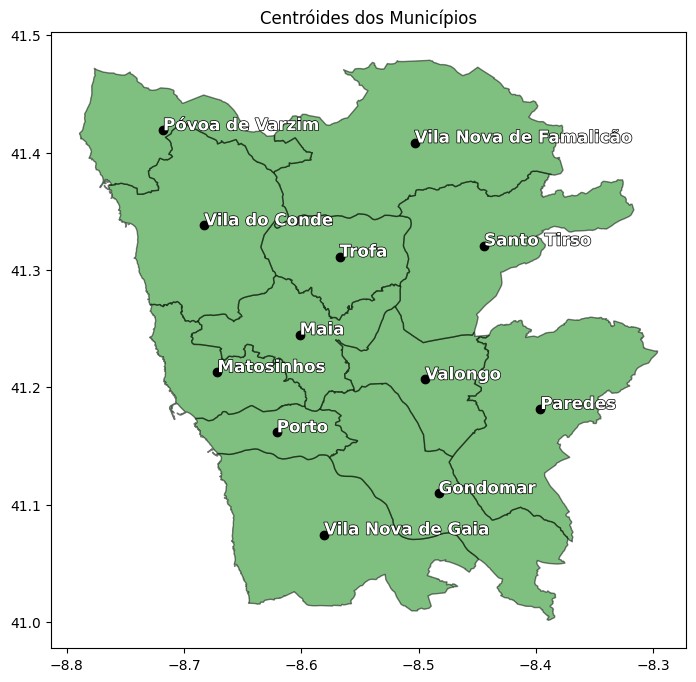

In [56]:
# plot the freguesias and municipios
fig, ax = plt.subplots(figsize=(10, 8))
freguesias = gdf_bbox[gdf_bbox['admin_level'] == '8']
municipios = gdf_bbox[gdf_bbox['admin_level'] == '7']

# freguesias.plot(ax=ax, color='blue', edgecolor='white', alpha=0.5)
municipios.plot(ax=ax, color='green', edgecolor='black', alpha=0.5)

plt.title("Centróides dos Municípios")

# add the names of the municipios
for x, y, label in zip(municipios.geometry.centroid.x, municipios.geometry.centroid.y, municipios['name']):
    txt = ax.text(x, y, label, fontsize=12, color='white', weight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])
    ax.plot(x, y, 'o', color='black')
    
plt.show()

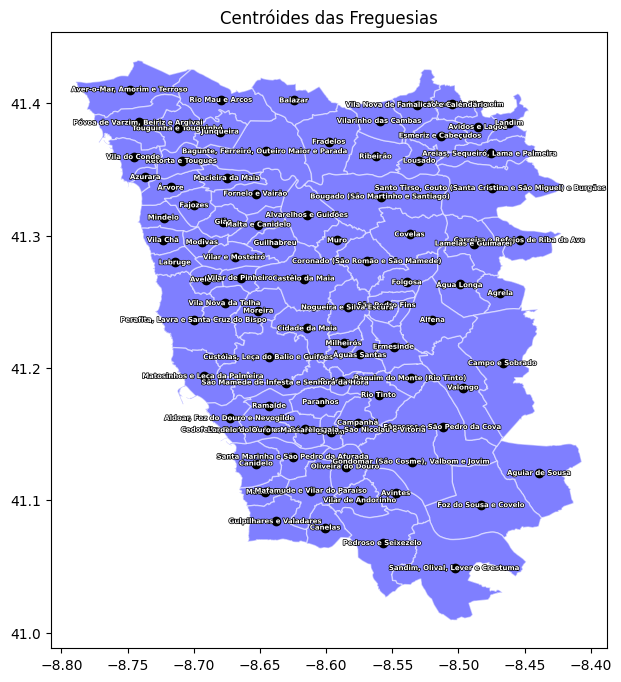

In [59]:
# plot the centroids
fig, ax = plt.subplots(figsize=(10, 8))

plt.title("Centróides das Freguesias")
freguesias.plot(ax=ax, color='blue', edgecolor='white', alpha=0.5)
# add the names of the freguseias
for x, y, label in zip(freguesias.geometry.centroid.x, freguesias.geometry.centroid.y, freguesias['name']):
    txt = ax.text(x, y, label, fontsize=5, color='white', weight='bold', va='center', ha='center')
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])
    ax.plot(x, y, 'o', color='black')
    
plt.show()